In [1]:
imgpath = "Mosaicos/bosqueed.tif"

In [5]:
import rasterio
dataset = rasterio.open(imgpath)

In [8]:
dataset.crs

CRS.from_epsg(32717)

In [9]:
dataset.bounds

BoundingBox(left=615357.7497404777, bottom=9762996.70609582, right=615527.3583145756, top=9763155.536489662)

In [10]:
dataset.transform

Affine(0.049987790774528765, 0.0, 615357.7497404777,
       0.0, -0.04999382871938626, 9763155.536489662)

In [11]:
dataset.indexes

(1, 2, 3, 4)

In [17]:
img = dataset.read(4)
print(img)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


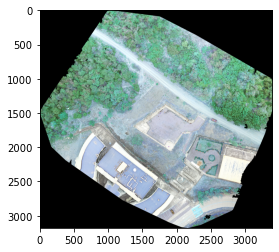

<AxesSubplot:>

In [21]:
import numpy as np
from rasterio.plot import show, adjust_band
imgdata = np.array([adjust_band(dataset.read(i)) for i in (3,2,1)])
show(imgdata)  # factor 3 to increase brightness

In [24]:
x, y = dataset.xy(500,500)
print(x,y)

615382.7686297604 9763130.514578389


In [25]:
x, y = dataset.transform * (500, 500)
print(x,y)

615382.7436358649 9763130.539575303


In [26]:
row, column = dataset.index(x, y)
print(row,column)

500 500


In [42]:
from shapely.geometry import Polygon
x, y, edgelen = 615382, 9763130, 200  # based on EPSG:32631
roi = Polygon([(x - int(edgelen / 2), y + int(edgelen / 2)),
               (x + int(edgelen / 2), y + int(edgelen / 2)),
               (x + int(edgelen / 2), y - int(edgelen / 2)),
               (x - int(edgelen / 2), y - int(edgelen / 2))])
print(roi)

POLYGON ((615282 9763230, 615482 9763230, 615482 9763030, 615282 9763030, 615282 9763230))


(4, 2512, 2486)


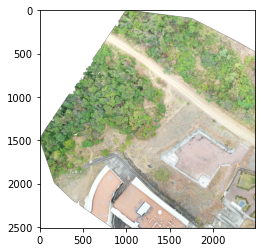

<AxesSubplot:>

In [43]:
from rasterio.mask import mask
crop_img, crop_transform = mask(dataset, shapes=[roi], crop=True)
crop_img = adjust_band(crop_img)
print(crop_img.shape)
show(crop_img)